Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 75, 75, 3)         0         
                                                                 
 random_flip (RandomFlip)    (None, 75, 75, 3)         0         
                                                                 
 random_rotation (RandomRot  (None, 75, 75, 3)         0         
 ation)                                                          
                                                                 
 conv2d (Conv2D)             (None, 75, 75, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 37, 37, 32)        0         
 D)                                                     

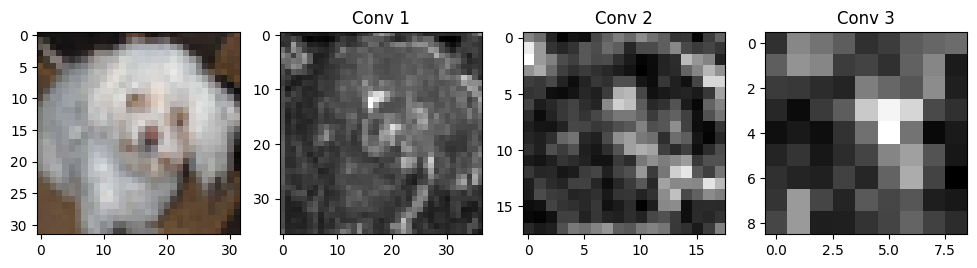

In [4]:
import keras

# Load the data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

# Get one image
image = x_test[2000]

# Load the model
model = keras.models.load_model('cifar_cnn.keras')
model.summary()

outputs = []
# Define submodels
for i in range(3):
    submodel = keras.models.Model(inputs=model.input, outputs=model.layers[5+3*i].output)
    outputs.append(submodel.predict(image.reshape(1,32,32,3))[0,:,:,:].sum(axis=2))

# Plot the outputs
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(1,4, figsize=(12,4))
axes[0].imshow(image)
for i in range(3):
    axes[i+1].imshow(outputs[i], cmap='gray')
    axes[i+1].set_title('Conv {}'.format(i+1))